<a href="https://colab.research.google.com/github/nhunguet/AI_Security/blob/master/aim_nonlinear_least_squares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tutorial for nonlinear least squares methods

Instructor: JaKeoung Koo @ Gachon University

The goal is to miminimze
$$\min_w \sum_i^N (f(x_i,w)-y_i)^2$$

- N data points $\{x_i, y_i\}_{i=1,...,N}$
- Predictive model: $f(x,w)=w_0 \exp(w_1 x)\cos(w_2 x+w_3)$
- Unknown parameters: $w=(w_0, w_1, w_2, w_3)$
- residual: $r_i := f(x_i,w)-y_i$
- residual vector: $r = (r_1, ..., r_N)^T$
- $J=dr/dw$

**Exercise 1.**

Change data so that Gauss-Newton method fits data well.
- Change N (number of data points)
- Initial parameters (the ground truth is set as (1,2,3,4))
- Try reducing the varaince of the noise, when generating data.

**Exercise 2.**

If Levenberg-Marquardt method doesn't converge, try to increase lambda.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, w):
    return w[0] * np.exp(w[1] * x) * np.cos(w[2] * x + w[3])

def residuals(w, x, y):
    return f(x, w) - y

def jacobian(w, x):
    J = np.empty((x.size, w.size))
    J[:, 0] = np.exp(w[1] * x) * np.cos(w[2] * x + w[3])
    J[:, 1] = w[0] * x * np.exp(w[1] * x) * np.cos(w[2] * x + w[3])
    J[:, 2] = -w[0] * np.exp(w[1] * x) * x * np.sin(w[2] * x + w[3])
    J[:, 3] = -w[0] * np.exp(w[1] * x) * np.sin(w[2] * x + w[3])
    return J

def gauss_newton(x_data, y_data, initial_w, max_iter=100, tol=1e-6):
    obj_vals = []
    w = initial_w.copy()
    for _ in range(max_iter):
        r = residuals(w, x_data, y_data)
        obj_val = np.linalg.norm(r)**2
        obj_vals.append(obj_val)
        # print(f"objective function: {obj_val}")
        J = jacobian(w, x_data)

        try:
            delta = -0.5*np.linalg.solve(J.transpose().dot(J), J.transpose().dot(r))
        except Exception as e:
            print("J^T J is not invertible")
            break; raise

        w += delta
        if np.linalg.norm(delta) < tol:
            break

    return w, obj_vals

def levenberg_marquardt(x_data, y_data, initial_w, lambda_, max_iter=100, tol=1e-6):
    obj_vals = []
    w = initial_w.copy()
    for _ in range(max_iter):
        r = residuals(w, x_data, y_data)
        obj_val = np.linalg.norm(r)**2
        obj_vals.append(obj_val)

        J = jacobian(w, x_data)
        H = J.T @ J + lambda_ * np.identity(w.shape[0])
        delta = -0.5*np.linalg.solve(H, J.transpose().dot(r))

        w += delta
        if np.linalg.norm(delta) < tol:
            break

    return w, obj_vals

# Example usage
N = 30 # number of data
x_data = np.linspace(0, 3, N)
gt_w = np.array([1, 2, 3, 4]) # ground truth for w
y_data = f(x_data, gt_w)
np.random.seed(1)
y_data += 0.001 * np.random.randn(y_data.shape[0])
# y_data = np.array([0.2, 0.4, 0.6, 0.8, 1.0])
initial_w = np.array([1.0, 1.0, 2.0, 1.0])

optimized_w_gn, obj_vals_gn = gauss_newton(x_data, y_data, initial_w)
print("Gauss-Newton Optimized w:", optimized_w_gn)

optimized_w_lm, obj_vals_lm = levenberg_marquardt(x_data, y_data, initial_w, lambda_=30)
print("Levenberg-Marquardt Optimized w:", optimized_w_lm)


J^T J is not invertible
Gauss-Newton Optimized w: [  365.38490428 -7673.0480834   5706.19052858 44694.57712027]
Levenberg-Marquardt Optimized w: [ 1.00001724  1.9999933  -2.99997859  8.5663154 ]


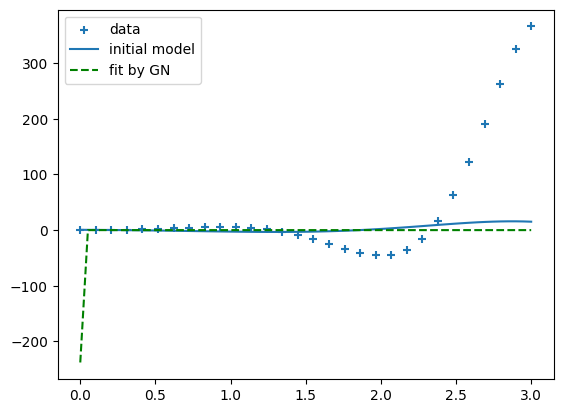

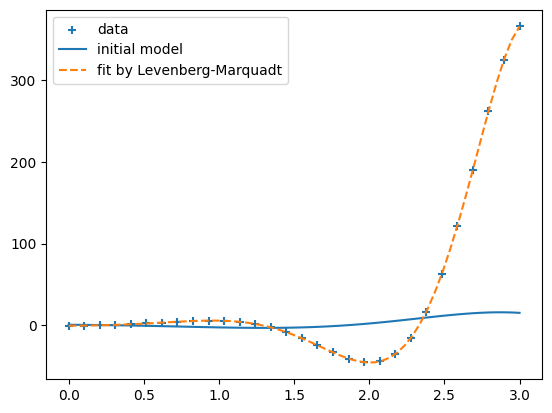

In [ ]:
xx = np.linspace(0, 3, 2*N)
plt.scatter(x_data, y_data, marker="+")
plt.plot(xx, f(xx, initial_w))
plt.plot(xx, f(xx, optimized_w_gn), "g--")
plt.legend(["data", "initial model", "fit by GN"])
plt.show()

plt.scatter(x_data, y_data, marker="+")
plt.plot(xx, f(xx, initial_w))
plt.plot(xx, f(xx, optimized_w_lm), linestyle="dashed")
plt.legend(["data", "initial model", "fit by Levenberg-Marquadt"])
plt.show()

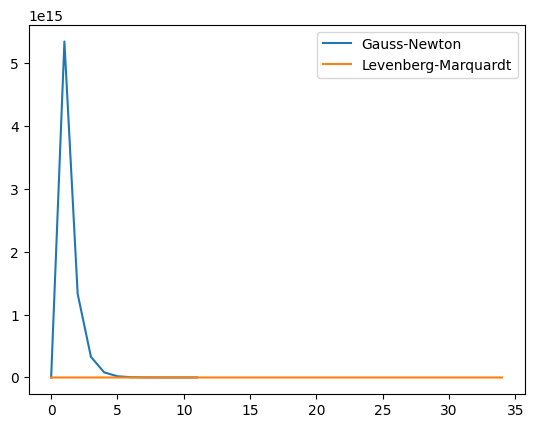

In [ ]:
plt.plot(obj_vals_gn)
plt.plot(obj_vals_lm)
plt.legend(["Gauss-Newton", "Levenberg-Marquardt"])